c:\Python\Python313\Lib\site-packages\sklearn\ensemble\_iforest.py:336: UserWarning: max_samples (100) is greater than the total number of samples (10). max_samples will be set to n_samples for estimation.
  warn(


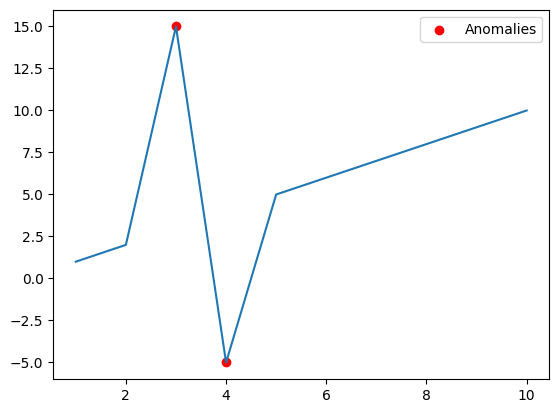

In [5]:

#Import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

#Create a random dataframe
data = pd.DataFrame(
    {'time': [1,2,3,4,5,6,7,8,9,10],
     'value': [1,2,15,-5,5,6,7,8,9,10]
    })

#Plot data
plt.plot(data['time'], data['value'])

#Fit the model
clf = IsolationForest(max_samples=100, random_state=50, contamination=0.2)
clf.fit(data['value'].values.reshape(-1,1))

#Create a list of anomalies
anomaly = clf.predict(data['value'].values.reshape(-1,1))

#Create a list of anomalous data points
anomaly_data = data[anomaly == -1]

#Plot anomalies
plt.scatter(anomaly_data['time'], anomaly_data['value'], color='r', label = 'Anomalies')
plt.legend()

In [6]:
from openai import AzureOpenAI
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

response = client.responses.create(
    model="gpt-5-mini",
    reasoning={"effort": "low"},
    input="""Take this data and tell me the anaomolies (just the anomolies not your working out) ''time': [1,2,3,4,5,6,7,8,9,10] 'value': [1,2,15,-5,5,6,7,8,9,10]""",
)

print(response.output_text)



[(3, 15), (4, -5)]


In [7]:
import pandas as pd
df = pd.read_csv('data\TravelTime_387.csv')


<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\rolester\AppData\Local\Temp\ipykernel_56968\2141314767.py:2: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('data\TravelTime_387.csv')


,timestamp,value
269,2015-07-23 03:55:00,2858
270,2015-07-23 04:15:00,2781
271,2015-07-23 04:24:00,2891
333,2015-07-25 05:39:00,2941
334,2015-07-25 05:59:00,2848
335,2015-07-25 06:03:00,2924
428,2015-07-30 12:29:00,2003
989,2015-08-18 16:26:00,5059
1539,2015-09-01 08:06:00,1621
1540,2015-09-01 08:16:00,1680


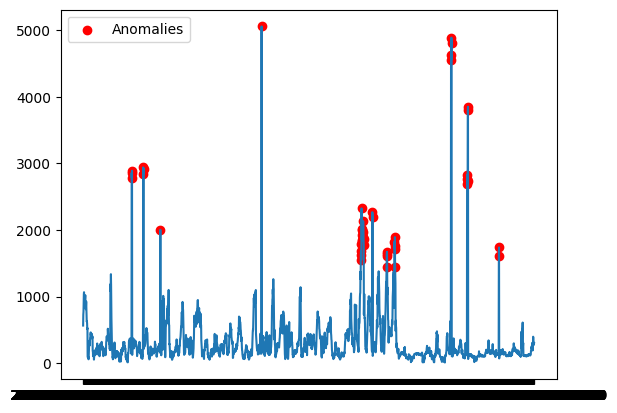

In [8]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

data = df

#Plot data
plt.plot(data['timestamp'], data['value'])

#Fit the model
clf = IsolationForest(max_samples=100, random_state=50, contamination=0.02)
clf.fit(data['value'].values.reshape(-1,1))

#Create a list of anomalies
anomaly = clf.predict(data['value'].values.reshape(-1,1))

#Create a list of anomalous data points
anomaly_data = data[anomaly == -1]

#Plot anomalies
plt.scatter(anomaly_data['timestamp'], anomaly_data['value'], color='r', label = 'Anomalies')
display(plt.legend())

anomaly_data


In [11]:
from openai import AzureOpenAI
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

response = client.responses.create(
    model="gpt-5-mini",
    #temperature=0.7,
    reasoning={"effort": "medium"},
    input="""Take this data and tell me the anaomolies (just the anomolies not your working out) """ + df.to_json(),
)

print(response.output_text)

print(response.usage) # input_tokens=50643


2015-07-23 03:55:00 - 2858
2015-07-23 04:15:00 - 2781
2015-07-23 04:24:00 - 2891
2015-07-25 05:39:00 - 2941
2015-07-25 05:59:00 - 2848
2015-07-25 06:03:00 - 2924
2015-07-30 10:08:00 - 2003
2015-08-18 16:26:00 - 5059
2015-09-01 08:36:00 - 2325
2015-09-01 08:46:00 - 2014
2015-09-01 21:22:00 - 2268
2015-09-01 21:32:00 - 2190
2015-09-10 23:13:00 - 4630
2015-09-10 23:18:00 - 4562
2015-09-11 00:13:00 - 4891
2015-09-12 01:42:00 - 2769
2015-09-12 01:52:00 - 2697
2015-09-12 02:12:00 - 2833
2015-09-12 02:20:00 - 2730
2015-09-12 02:42:00 - 3799
2015-09-12 02:53:00 - 3853
ResponseUsage(input_tokens=50642, input_tokens_details=InputTokensDetails(cached_tokens=0), output_tokens=3690, output_tokens_details=OutputTokensDetails(reasoning_tokens=3328), total_tokens=54332)


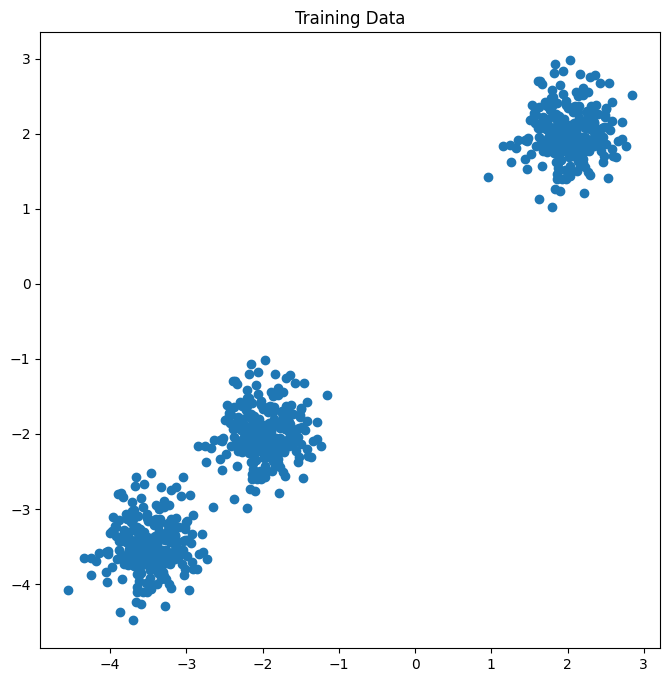

None

<Figure size 640x480 with 0 Axes>

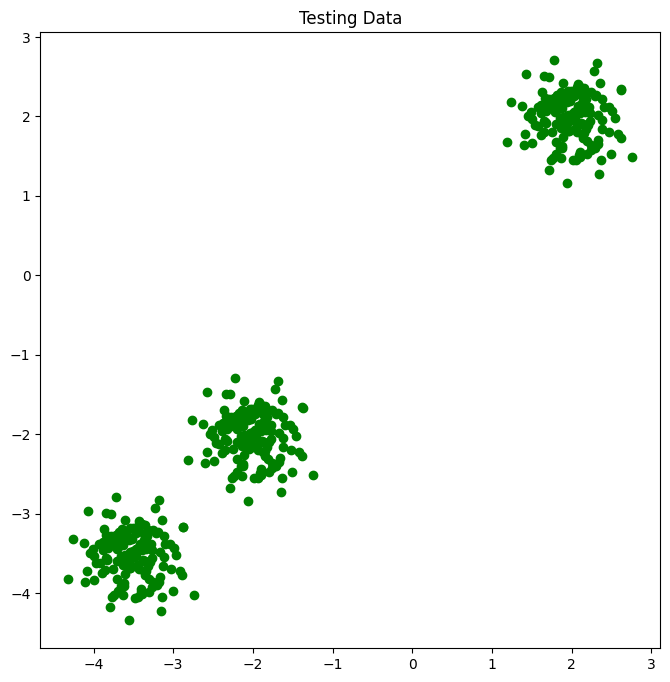

None

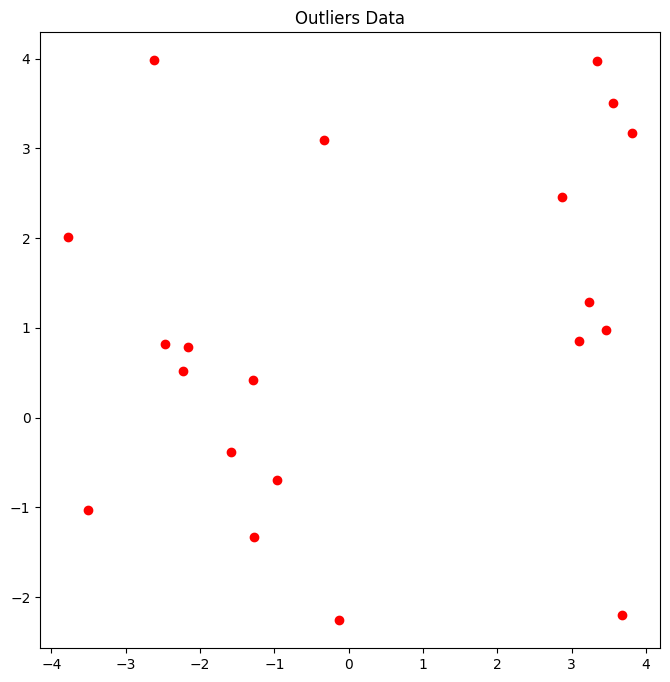

None

<Figure size 640x480 with 0 Axes>

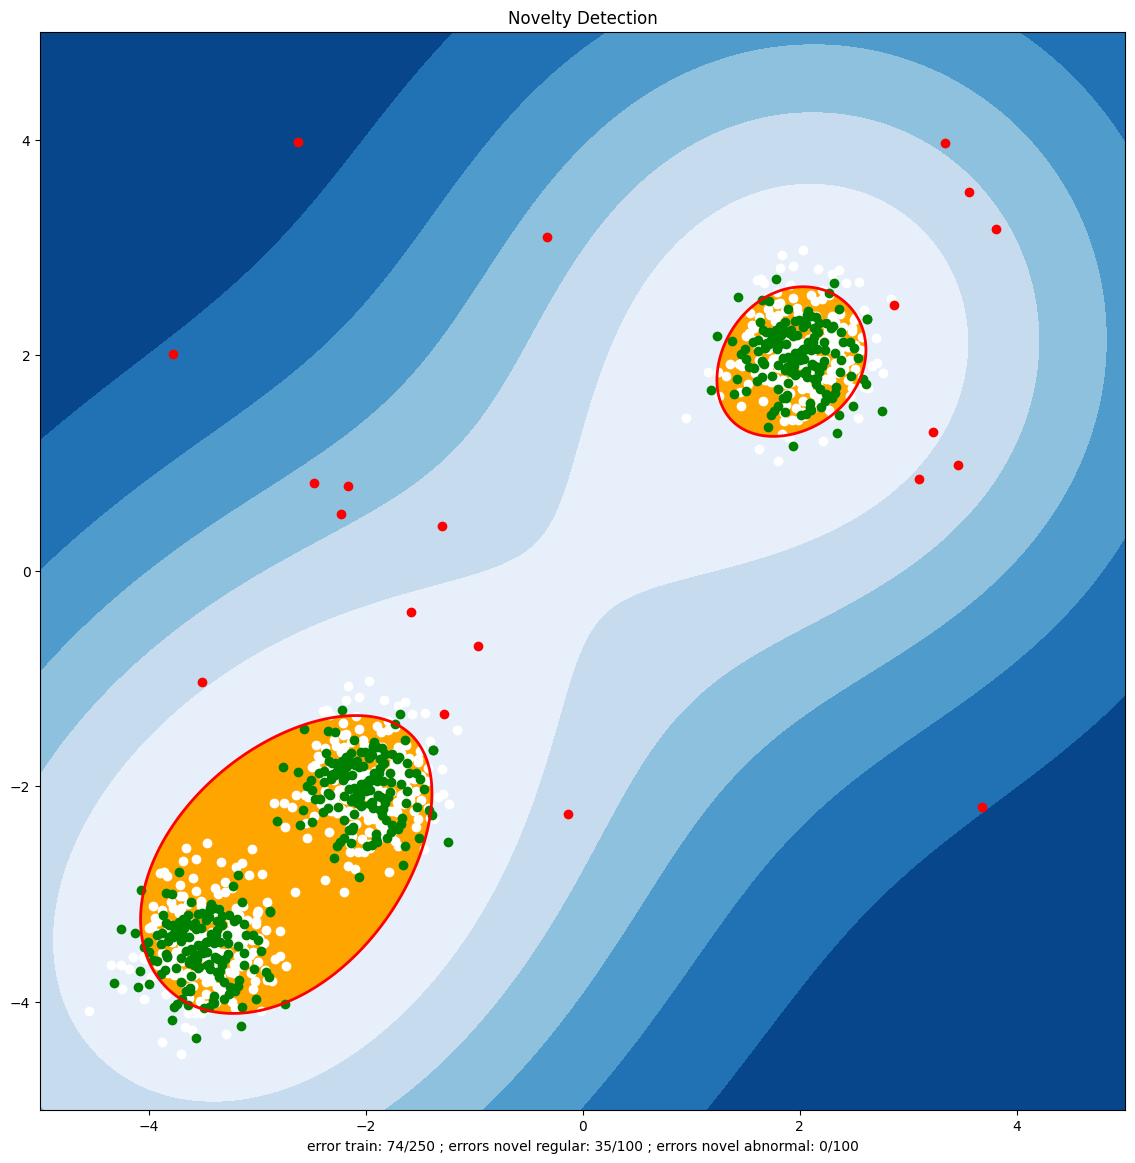

None

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
 
# Generate train data
X = 0.3 * np.random.randn(250, 2)
#X_train = np.r_[X + 2, X - 2]
X_train = np.r_[X + 2, X - 2, X - 3.5]
# Generate some regular novel observations
X = 0.3 * np.random.randn(150, 2)
#X_test = np.r_[X + 2, X - 2]
X_test = np.r_[X + 2, X - 2, X - 3.5]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

#Plot Training Data
plt.figure(figsize = (8,8)) 
plt.scatter(X_train[:,0], X_train[:,1])
plt.title("Training Data")
dispA = plt.show()
display(dispA)
plt.clf()

#Plot Testing Data
plt.figure(figsize = (8,8)) 
plt.scatter(X_test[:,0], X_test[:,1], color="green")
plt.title("Testing Data")
dispA = plt.show()
display(dispA)
#plt.clf()

#Plot Outliers
plt.figure(figsize = (8,8)) 
plt.scatter(X_outliers[:,0], X_outliers[:,1], color="red")
plt.title("Outliers Data")
dispA = plt.show()
display(dispA)
plt.clf()

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize = (14,14)) 
 
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')
 
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel(
    "error train: %d/250 ; errors novel regular: %d/100 ; "
    "errors novel abnormal: %d/100"
    % (n_error_train, n_error_test, n_error_outliers))
disp2 = plt.show()
display(disp2)
plt.clf()



In [ ]:
from openai import AzureOpenAI
from azure.identity import DefaultAzureCredential, get_bearer_token_provider
import json
#add X_train and X_test together into one array
Xcomb = np.r_[X_train, X_test]

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

response = client.responses.create(
    model="gpt-5-mini",
    #temperature=0.7,
    reasoning={"effort": "medium"},
    input="""Take this data and tell me the anaomolies (just the anomolies points not your working out) use distance from centroids with 3 clusters. No specific threshold""" + json.dumps(Xcomb.tolist()),
)

print(response.output_text)

print(response.usage) # total_tokens=23133


[2.8436240729588356, 2.1179711286290375]
[2.7667610893278147, 1.7026616520015614]
[2.912308187670906, 2.2461791372798374]
[2.863191235423879, 1.4917102064807095]
[2.972969582974986, 2.036276783455523]
[2.8850296340015884, 2.4668090723457547]
[2.5402872713322955, 2.6137517584457424]
[2.5659861126573014, 2.44491689505363]
[2.601023643646082, 2.447801756289659]
[2.371978185465483, 2.555356963528972]
[2.519317059079389, 2.0476772053900474]
[2.519780820632349, 1.9790919487387402]
[2.5816753093456883, 1.4716997975085462]
[2.623672623318723, 2.0617787346772585]
[2.4066641356843865, 2.0201832150225254]
[2.4630978405930732, 2.391138057274878]
[2.4830474802971443, 2.4093656441239704]
[-4.0790144160037647, -4.2635293149999605]
[-4.151222311138163, -4.3594596712385156]
[-4.3326540547807, -3.2494606838679287]
[-4.120659248124408, -3.5387334545065934]
[-4.242907537650577, -3.738944383912349]
[-4.222673351356418, -3.630423865919888]
[-3.9188819127661296, -3.9122038491517244]
[-3.9847380977811255, -3.

In [20]:
anoms = np.array([
[2.8436240729588356, 2.1179711286290375],
[2.7667610893278147, 1.7026616520015614],
[2.912308187670906, 2.2461791372798374],
[2.863191235423879, 1.4917102064807095],
[2.972969582974986, 2.036276783455523],
[2.8850296340015884, 2.4668090723457547],
[2.5402872713322955, 2.6137517584457424],
[2.5659861126573014, 2.44491689505363],
[2.601023643646082, 2.447801756289659],
[2.371978185465483, 2.555356963528972],
[2.519317059079389, 2.0476772053900474],
[2.519780820632349, 1.9790919487387402],
[2.5816753093456883, 1.4716997975085462],
[2.623672623318723, 2.0617787346772585],
[2.4066641356843865, 2.0201832150225254],
[2.4630978405930732, 2.391138057274878],
[2.4830474802971443, 2.4093656441239704],
[-4.0790144160037647, -4.2635293149999605],
[-4.151222311138163, -4.3594596712385156],
[-4.3326540547807, -3.2494606838679287],
[-4.120659248124408, -3.5387334545065934],
[-4.242907537650577, -3.738944383912349],
[-4.222673351356418, -3.630423865919888],
[-3.9188819127661296, -3.9122038491517244],
[-3.9847380977811255, -3.772306456569716]])

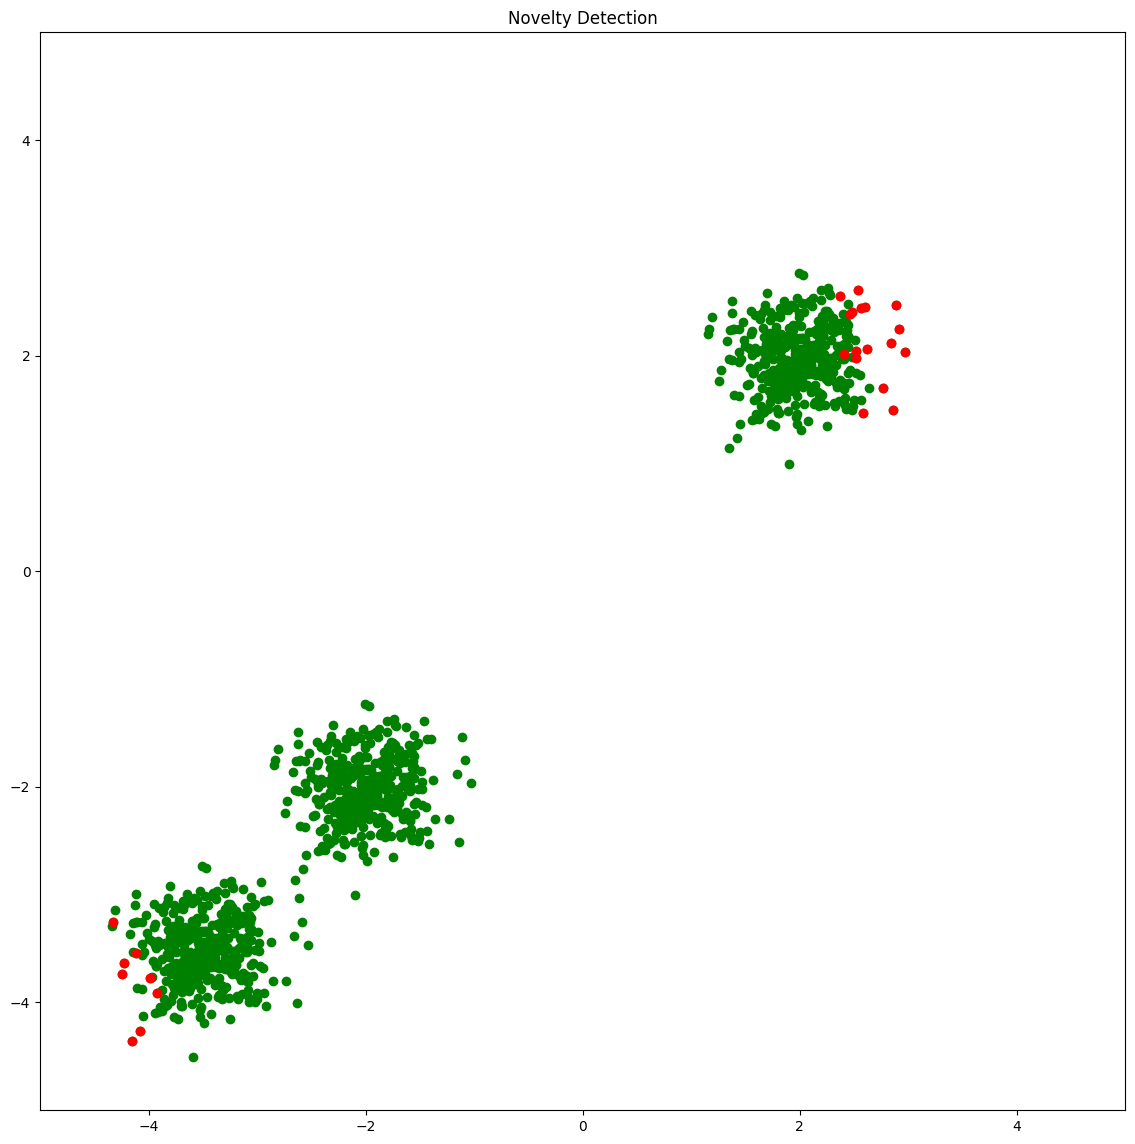

None

<Figure size 640x480 with 0 Axes>

In [21]:

# plot the line, the points, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

plt.figure(figsize = (14,14)) 
plt.title("Novelty Detection")

b1 = plt.scatter(Xcomb[:, 0], Xcomb[:, 1], c='green')
#b1 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blue')
c = plt.scatter(anoms[:, 0], anoms[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
# plt.xlabel(
#     "error train: %d/250 ; errors novel regular: %d/100 ; "
#     "errors novel abnormal: %d/100"
#     % (n_error_train, n_error_test, n_error_outliers))
disp2 = plt.show()
display(disp2)
plt.clf()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
 
# Generate train data
X = 0.3 * np.random.randn(250, 2)
#X_train = np.r_[X + 2, X - 2]
X_train = np.r_[X + 2, X - 2, X - 3.5]
# Generate some regular novel observations
X = 0.3 * np.random.randn(150, 2)
#X_test = np.r_[X + 2, X - 2]
X_test = np.r_[X + 2, X - 2, X - 3.5]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

from openai import AzureOpenAI
#add code interpreter

from azure.identity import DefaultAzureCredential, get_bearer_token_provider
import json
#add X_train and X_test together into one array
Xcomb = np.r_[X_train, X_test]

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

response = client.responses.create(
    model="gpt-5-mini",
    tools=[
    {
        "type": "code_interpreter",
        "container": {"type": "auto"}
    }
    ],
    #temperature=0.7,
    reasoning={"effort": "medium"},
    input="""Take this data and tell me the anaomolies using a single class SVM and then plot the results""" + json.dumps(Xcomb.tolist()),
)

print(response.output_text)

print(response.usage) # total_tokens=23133


In [ ]:
from azure.ai.agents.models import BingGroundingTool 
from azure.ai.agents.models import FileSearchTool, MessageAttachment, FilePurpose
from azure.ai.agents.models import CodeInterpreterTool
from azure.ai.agents.models import FileSearchTool
from azure.ai.projects import AIProjectClient
from azure.identity import DefaultAzureCredential
from azure.ai.agents.models import FunctionTool, ToolSet

Xcomb = np.r_[X_train, X_test]

df = pd.DataFrame(Xcomb, columns=["feature1", "feature2"])
df.to_csv("./data/Xcomb.csv", index=False)


project = AIProjectClient(
    credential=DefaultAzureCredential(),
    endpoint="https://aifsweden.services.ai.azure.com/api/projects/AIFSwedenProject01",
)

model = "gpt-4.1-mini"
agentname = "demoagent"

toolset = ToolSet()

#Agents - upload a file to ground and search
file = project.agents.files.upload_and_poll(file_path="./data/Xcomb.csv", purpose="assistants")
#from azure.ai.agents.models import FilePurpose
code_interpreter = CodeInterpreterTool(file_ids=[file.id])
toolset.add(code_interpreter)

agent = project.agents.create_agent(
    model=model,
    name=agentname,
    instructions="You are a data scientist",
    toolset=toolset,
)

# create a thread
thread = project.agents.threads.create()
print(f"Created thread, thread ID: {thread.id}")

# create a message
message = project.agents.messages.create(
    thread_id=thread.id,
    role="user",
    content="Take this data and tell me the anaomolies using a single class SVM. Create an html file using Bokeh. Provide the html file to me",
)

print(f"Created message, message ID: {message.id}")

# create and execute a run
run = project.agents.runs.create_and_process(thread_id=thread.id, agent_id=agent.id)
print(f"Run finished with status: {run.status}")

if run.status == "failed":
    # Check if you got "Rate limit is exceeded.", then you want to get more quota
    print(f"Run failed: {run.last_error}")
else:
    try:
        # # print the messages from the agent
        messages = project.agents.messages.list(thread_id=thread.id)

        messages_list = list(messages)
        for message in reversed(messages_list):
                print(f"Role: {message.role}, Content: {message.content[0].text.value}")
                if message.content[0].text.annotations !=[]:
                    fileId = message.content[0].text.annotations[0].file_path.file_id
                    print(fileId)
                    fileName = message.content[0].text.annotations[0].text

                    project.agents.files.save(file_id=fileId, file_name="htmlpage.html",target_dir="images")

                    print(fileName)
                    
                    import IPython.display

                    IPython.display.HTML('./images/htmlpage.html') 
        
    except Exception as e:
        print(f"Error: {e}")
    finally:
        # delete the file and thread
        project.agents.files.delete(file.id)
        project.agents.files.delete(thread.id)
        project.agents.delete_agent(agent.id)



Created thread, thread ID: thread_Amx75fhOFBExbwhO6nNQTNbT
Created message, message ID: msg_UfUIkTCvy80WaxxJudBf5YMo
Run finished with status: RunStatus.COMPLETED
Role: MessageRole.USER, Content: Take this data and tell me the anaomolies using a single class SVM. Create an html file using Bokeh. Provide the html file to me
Role: MessageRole.AGENT, Content: Let's start by loading the data and inspecting its structure. Then, we'll apply a one-class SVM to identify anomalies and visualize the results using Bokeh. Finally, I'll create an HTML file for the visualization and provide it to you.
Role: MessageRole.AGENT, Content: The dataset contains 1200 rows and 2 features (feature1 and feature2). I will now apply a One-Class SVM for anomaly detection and then visualize the results using Bokeh.

Let's proceed.
Role: MessageRole.AGENT, Content: The One-Class SVM detected 59 anomalies in the dataset.

Now, I will create an interactive visualization using Bokeh that highlights these anomalies, a

: 